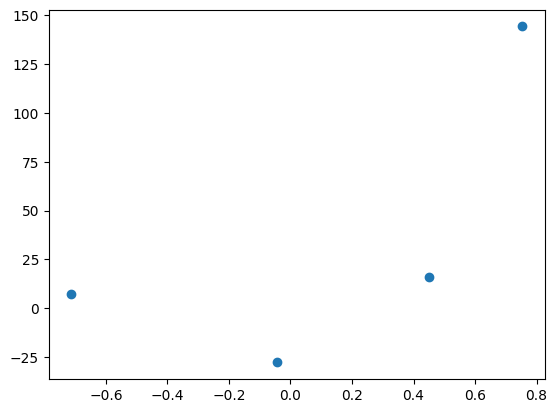

In [18]:
from sklearn.datasets import make_regression
import numpy as np


"""
This code generates a small synthetic dataset for regression using the `make_regression` function from `sklearn.datasets`.
Here's a breakdown of the parameters:

- `n_samples=4`: Generates 4 data points.
- `n_features=1`: Each data point has 1 feature.
- `n_informative=1`: Only 1 feature is actually informative (affects the target).
- `n_targets=1`: There is a single target variable (i.e., simple regression).
- `noise=80`: Adds Gaussian noise with a standard deviation of 80, making the data more scattered.
- `random_state=13`: Ensures reproducibility by setting a fixed random seed.

The function returns:
- `X`: A `(4,1)` NumPy array of input features.
- `y`: A `(4,)` NumPy array of corresponding target values.

This dataset is useful for testing and understanding regression models in a controlled environment.
"""
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)
     

import matplotlib.pyplot as plt
plt.scatter(X,y)

In [19]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression
     
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [20]:
reg.coef_,reg.intercept_

(array([78.35063668]), 26.15963284313262)

In [25]:
reg.predict(X)

array([-29.65662909,  61.55941724,  22.67278832,  85.21770852])

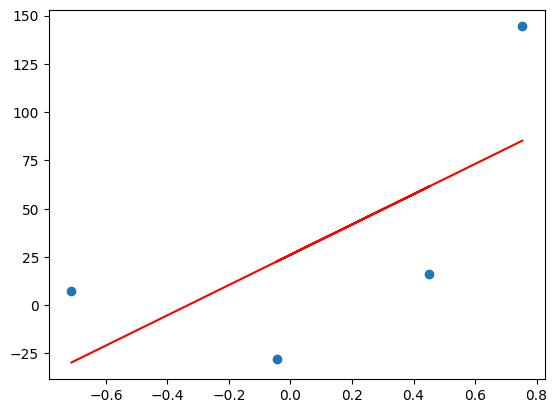

In [21]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [22]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 100
y_pred = ((78.35 * X) + 100)

In [26]:
y_pred

array([[ 44.18419163],
       [135.39949674],
       [ 96.51318381],
       [159.05759577]])

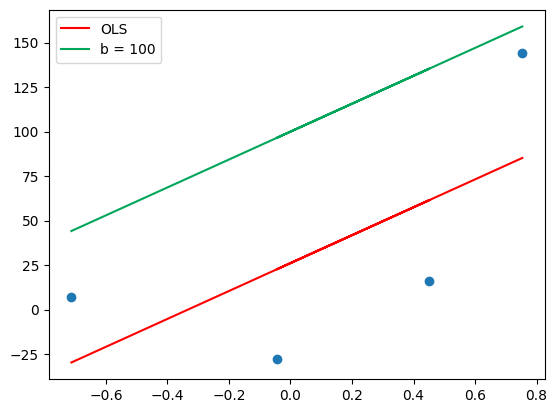

In [27]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 100')
plt.legend()
plt.show()

In [32]:
X,X.ravel()

(array([[-0.71239066],
        [ 0.45181234],
        [-0.04450308],
        [ 0.75376638]]),
 array([-0.71239066,  0.45181234, -0.04450308,  0.75376638]))

In [33]:
y-X,y-X.ravel()

(array([[  7.93025618,  16.75848991, -27.125171  , 145.07927255],
        [  6.76605318,  15.59428691, -28.289374  , 143.91506955],
        [  7.26236859,  16.09060232, -27.79305859, 144.41138497],
        [  6.46409914,  15.29233287, -28.59132804, 143.61311551]]),
 array([  7.93025618,  15.59428691, -27.79305859, 143.61311551]))

In [34]:
m = 78.35
b = 100


loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

590.7223659179078

In [35]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

59.072236591790784

In [36]:
# Calculating the new intercept
b = b - step_size
b

40.927763408209216

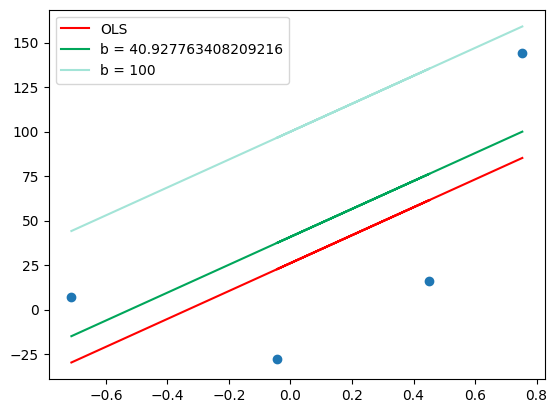

In [38]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 100')
plt.legend()
plt.show()

In [39]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)

step_size = loss_slope*lr

b = b - step_size
b

29.11331608985106

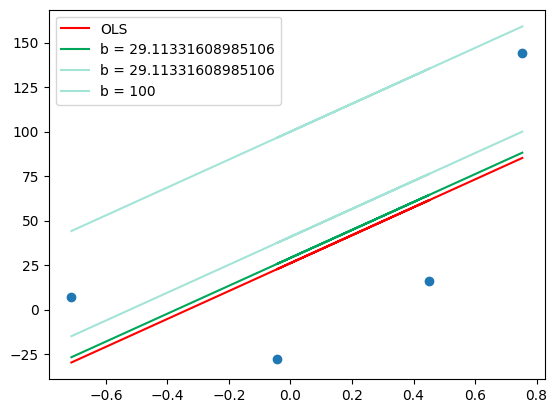

In [41]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 100')
plt.legend()
plt.show()

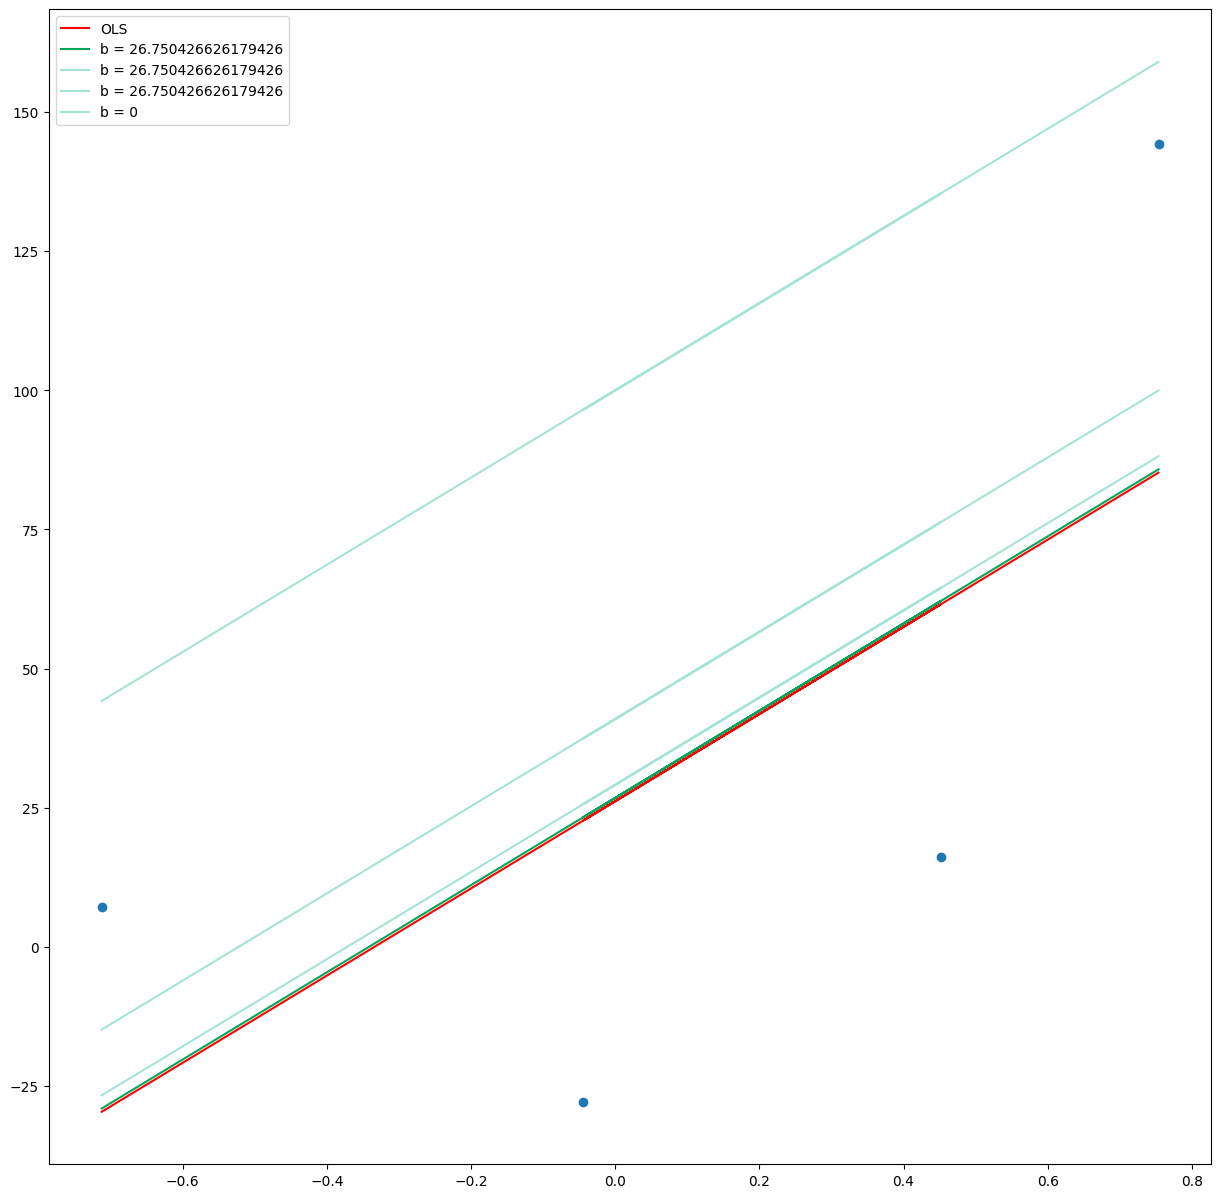

In [42]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)


step_size = loss_slope*lr


b = b - step_size


y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

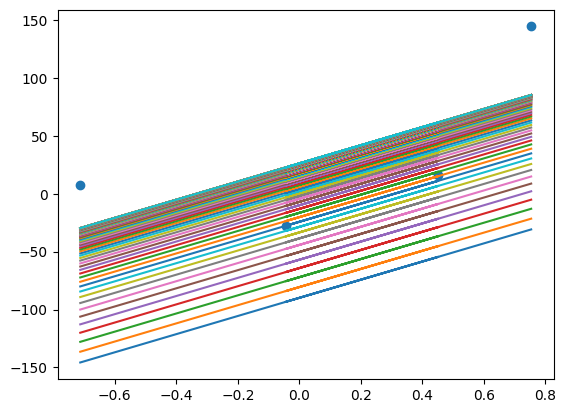

In [43]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)